# DICOM

DICOM (Digital Imaging and Communications in Medicine) – это международный стандарт для работы с медицинскими изображениями и связанными с ними данными. Он обеспечивает универсальный формат хранения, обмена и управления информацией, полученной с помощью диагностического оборудования (КТ, МРТ, УЗИ, рентген и др.).

Стандартное расширение для DICOM-файлов – `.dcm` (иногда используются расширения `.dicom`, `.dc3`, `.ima`). Помимо изображений, DICOM-файлы содержат метаданные и аннотации.

Для просмотра файлов DICOM используются специализированные DICOM-вьюеры: RadiAnt DICOM Viewer, Horos, Weasis, OsiriX MD, Syngo.via и др. Для глубокого редактирования используются DICOM-редакторы, такие как MITK Workbench и 3D Slicer. Для исследований используются программы ImageJ, ITK-SNAP. Также используются такие программы как DICOM Anonymizer или DVTk для обезличивания данных.

Помимо формата медицинских изображений, DICOM определяет стандарты для хранения и передачи файлов.

# Unique Identifier (UID)

В DICOM для идентификации различных сущностей используются **уникальные идентификаторы** (*Unique Identifier* – UID). UID представляет собой строку чисел, разделенных точками, и обеспечивает глобальную уникальность каждого элемента в системе. UID состоит из двух частей: **организационный корень** (*org root*) и суффикс. Организационный корень является идентификатором организации – производителя оборудования или медицинского учреждения. Суффикс генерируется организацией для идентификации конкретных сущностей внутри своей системы.

В качестве примера рассмотрим идентификатор способа кодирования данных (Transfer Syntax UID) `1.2.840.10008.1.2.1`. Организационным корнем здесь является `1.2.840.10008`. Это идентификатор организации NEMA (National Electrical Manufacturers Association). Суффикс `1.2.1` определяет конкретный класс объекта – в данном случае, хранение КТ-изображений.


# Структура DICOM-файла



<div style="text-align: center;">
	<img src="DICOM__structure.png" alt="Description" width="200">
</div>

Каждый DICOM файл начинается с 128-байтовой **преамбулы** (*preamble*), зарезервированной для совместимости с другими форматами изображений. Если преамбула не используется, то она заполняется нулями. 

Далее идет **префикс** (*prefix*) – 4 байта (байты 128–131), содержащие символы `DICM` в кодировке ASCII, подтверждающий, что файл соответствует стандарту DICOM.

---

В DICOM структура данных организована в группы элементов данных, где каждый DICOM элемент (*data element*) имеет тег вида `(GGGG, EEEE)`. Тег занимает 2 байта, и представляется в 16-ричной системе. Первый байт содержит группу DICOM элемента, а второй байт – тип элемента в группе. 

>Преамбула и префикс не относятся к какой либо группе, так как они находятся вне структуры DICOM-элементов и предшествуют всей DICOM-информации.

После префикса идет **метаинформация файла** (*File Meta Information*) – группа 0002. Здесь располагаются метаданные, необходимые для идентификации и обработки файла. Первый элемент метаинформации содержит количество байт, занимаемых метаинформацией и занимает 12 байт (элемент с тегом `(0002,0000)`). Второй элемент `(0002,0001)` содержит версию метаинформации. 

>Transfer Syntax UID относится к метаинформации и имеет тег `(0002,0010)`.

---

Основное содержимое, включающее медицинские данные (и их метаданные), находятся в разделе Dataset, который представляет собой последовательность DICOM элементов, каждый из которых имеет следующую структуру:
- Tag – тег вида `(GGGG, EEEE)`. Все группы, кроме группы 0002, содержатся в Dataset.
- Value Representation (VR) – вид данных, хранящихся в DICOM элементе. Это может быть дата и время (DT), длинный текст (LT), десятичная строка (DS), строка кода (CS), другие байты (OB) и т.д. 
- Value Length (VL) – длина значения: 16- или 32-битное беззнаковое целое число, указывающее длину поля значения.
- Value Field (VF) – непосредственно значения: данные, такие как имя пациента, UID или пиксельные данных (Pixel Data).

>Элементы данных могут быть вложенными если в VR используется вид данных последовательность элементов (*sequence of items* – SQ). Это позволяет создавать сложные структуры, например, для последовательностей других идентификаторов пациента.

>Назначение тегов и соответствующих им Value Representation можно посмотреть в [этом списке](https://www.dicomlibrary.com/dicom/dicom-tags/).

>Пиксельные данные (*pixel data*) имеют тег `(7FE0,0010)`.

## Модальность 

Важной характеристикой DICOM-файлов является **модальность** (*modality*) – тип медицинского исследования или оборудование, с помощью которого получены данные. Она указывает на технологию визуализации (например, КТ, МРТ, рентген) и помогает классифицировать изображения для правильной интерпретации. Модальность хранится в теге `(0008,0060)` в виде значения типа Code String (CS) и состоит из 2–5 символов в верхнем регистре.

Основные типы модальностей:

| Значение | Расшифровка             | Пример использования         |
|----------|-------------------------|-------------------------------|
| **CT**   | Компьютерная томография | Сканирование органов грудной клетки. |
| **MR**   | Магнитно-резонансная томография | Исследование мозга или суставов. |
| **US**   | Ультразвук              | УЗИ брюшной полости или плода. |
| **CR**   | Компьютерная радиография | Рентген костей или легких. |
| **DX** / **DR**  | Цифровая радиография | Рентген костей или легких.    |
| **MG**   | Маммография             | Обследование молочных желез.  |
| **PT**   | Позитронно-эмиссионная томография | Онкологические исследования. |
| **XA**   | Рентгеноскопия         | Видеозапись движений органов (например, сердца). |


>Встречаются нестандартные значения (например, **OT** — Other), но они редко используются.

## Service-Object Pair (SOP)

Service-Object Pair (SOP) представляет собой пару: 
- **определение информационного объекта** (*Information Object Definition* – IOD) – структурированное описание медицинского объекта (КТ-изображение, отчёт или список процедур).
- **сервисные элементы DICOM** (*DICOM Message Service Elements* – DIMSE) – набор операций, которые можно выполнять с объектом, например, хранение, запрос, передача и другие.

Комбинация IOD и DIMSE формирует **SOP Class**, и каждый файл DICOM представляет собой экземпляр (**SOP Instance**) определенного класса. Каждый **SOP Class** имеет уникальный UID. Каждый экземпляр класса также имеет свой UID. Эти идентификаторы записаны в метаинформации файла с тегами `(0002,0002)` и `(0002,0003)` соответственно.

# Ресурсы

[DICOM Library](https://www.dicomlibrary.com/)

[The Cancer Imaging Archive (TCIA)](https://www.cancerimagingarchive.net/)

[MAGNETOM World - DICOM Images](https://www.magnetomworld.siemens-healthineers.com/clinical-corner/protocols/dicom-images)

[Orthanc DICOM server](https://www.orthanc-server.com/)

При поиске источников следует уточнить:
- Какие модальности интересуют: КТ, МРТ, маммография, рентген, УЗИ?
- Предпочтения по доступу: свободный доступ, через API, Kaggle, GitHub, TCIA?
- Есть ли интерес к конкретным патологиям (напр. COVID-19, рак, травмы)?

# Pydicom

Библиотека Pydicom для языка программирования Python позволяет работать с файлами DICOM: производить чтение, редактирование и анализ медицинских изображений и связанных с ними метаданных. Это одна из самых популярных библиотек в медицинской информатике и научных проектах, связанных с обработкой медицинских изображений.

Установить Pydicom можно пакетным менеджером `pip`:

    pip install pydicom

# Загрузка данных из репозитория

Воспользуемся [репозиторием](https://github.com/robyoung/dicom-test-files/tree/master/data/pydicom) из GitHub для получения DICOM файла. 

In [2]:
import requests

repo_url = "https://github.com/robyoung/dicom-test-files/raw/refs/heads/master/data/pydicom/"
file_name = "RG1_J2KI.dcm"

url = repo_url + file_name
response = requests.get(url, stream=True)
response.raise_for_status()

type(response), response

(requests.models.Response, <Response [200]>)

## Чтение файла из потока

In [3]:
import io
import pydicom

ds = pydicom.dcmread(io.BytesIO(response.content))
type(ds)

pydicom.dataset.FileDataset

## Сохранения файла на локальный диск

In [4]:
with open(file_name, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)

## Чтение файла с диска

In [5]:
import pydicom

ds = pydicom.dcmread(file_name)
type(ds)

pydicom.dataset.FileDataset

In [6]:
ds.save_as("modified.dcm")

# Работа с файлом DICOM

## Базовые поля объекта класса `FileDataset`

In [7]:
ds

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 192
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.9.1.3.20040826185059.5457
(0002,0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002,0013) Implementation Version Name         SH: 'DCTOOL100'
(0002,0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008,0012) Instance Creation Date              DA: '20040826'
(0008,0013) Instance Creation Time              TM: '185552'
(0008,0014) Instance Creator UID                UI: 1

In [8]:
ds.filename

'RG1_J2KI.dcm'

In [9]:
ds.preamble

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [10]:
ds.timestamp

1748955924.58615

In [11]:
ds.Modality

'CR'

In [12]:
from datetime import datetime

datetime.fromtimestamp(ds.timestamp)

datetime.datetime(2025, 6, 3, 16, 5, 24, 586150)

In [13]:
ds.file_meta

(0002,0000) File Meta Information Group Length  UL: 192
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.9.1.3.20040826185059.5457
(0002,0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002,0013) Implementation Version Name         SH: 'DCTOOL100'
(0002,0016) Source Application Entity Title     AE: 'CLUNIE1'

In [14]:
ds.file_meta.TransferSyntaxUID

'1.2.840.10008.1.2.4.91'

In [15]:
ds.SOPClassUID

'1.2.840.10008.5.1.4.1.1.1'

## Объекты класса `DataElement`

In [16]:
el = ds.file_meta.get((0x0002, 0x0001), default="unknown")
type(el) 

pydicom.dataelem.DataElement

In [17]:
print(el)

(0002,0001) File Meta Information Version       OB: b'\x00\x01'


In [18]:
el.tag, el.name, el.VR, el.value

((0002,0001), 'File Meta Information Version', 'OB', b'\x00\x01')

In [19]:
element = ds.get((0x0008, 0x0060), default="Unknown")
type(element)

pydicom.dataelem.DataElement

In [20]:
element.tag, element.name, element.VR, element.value

((0008,0060), 'Modality', 'CS', 'CR')

Есть также возможность создавать объекты класса `DataElement` и добавлять их в данные, при помощи метода `add_new()`.

# Работа с пиксельными данными

In [21]:
type(ds.PixelData)

bytes

In [22]:
array = ds.pixel_array
type(array)

numpy.ndarray

In [23]:
array.shape

(1955, 1841)

In [24]:
array.shape, array.dtype, array.min(), array.max()

((1955, 1841), dtype('uint16'), 803, 26512)

(-0.5, 1840.5, 1954.5, -0.5)

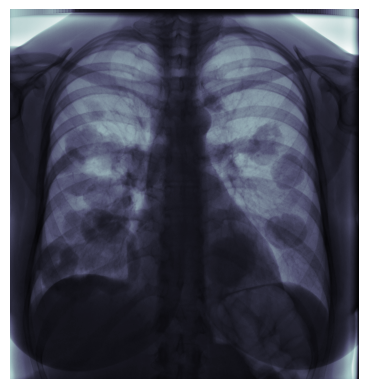

In [25]:
import matplotlib.pyplot as plt

plt.imshow(array, cmap=plt.cm.bone)
plt.axis("off")

In [26]:
from skimage import io

# сохраняем в TIFF — формат нативно поддерживает 16 бит
io.imsave(file_name[:-3] + 'tiff', array)